# Simple multi-rate simulation

Mikhail Pak, 2017

In [1]:
from controlboros import StateSpaceBuilder, RateWrapper
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In this notebook, we shall simulate the step response of a simple system using `scipy.signal` and `controlboros`.

The system is defined by the following transfer function:

$$H(s) = \frac{1}{s + 1}$$

We want to simulate from 0 to 1 s:

In [2]:
t_begin, t_end = 0.0, 1.0

We use 1 ms sample time for the reference simulation performed with `scipy.signal`:

In [3]:
dt = 1.0e-3

As for `controlboros`, we shall discretise $H(s)$ with 0.1 ms sample rate but simulate it with 1 ms sample rate. We define the corresponding rate multiplier:

In [4]:
multiplier = 100

Ok. Now we create a reference system using `scipy.signal` and compute its step response:

In [5]:
t_ref, y_ref = signal.step(
    ([1.0], [1.0, 1.0]),
    T=np.arange(t_begin, t_end, dt),
    )

Now we create a `controlboros.StateSpace` model using the builder pattern and wrap it using `controlboros.RateWrapper`:

In [6]:
sys_cb = StateSpaceBuilder().from_tf([1.0], [1.0, 1.0])\
                            .discretise(dt*multiplier)\
                            .build()
sys_cb_wrapped = RateWrapper(sys_cb, multiplier)

And we initialise arrays for the step response:

In [7]:
excitation = np.array([1.0])  # Constant step excitation
t_cb = np.arange(t_begin, t_end, dt)
y_cb = np.zeros((len(t_cb),))

We're ready to run the main loop:

In [8]:
# Reset the inital state of the systems,
# helpful if you run this cell multiple times!
sys_cb_wrapped.set_state_to_zero()
sys_cb_wrapped.reset_wrapper()

for i in range(len(t_cb)):
    y_cb[i] = sys_cb_wrapped.push_stateful(excitation)

Plot and compare results:

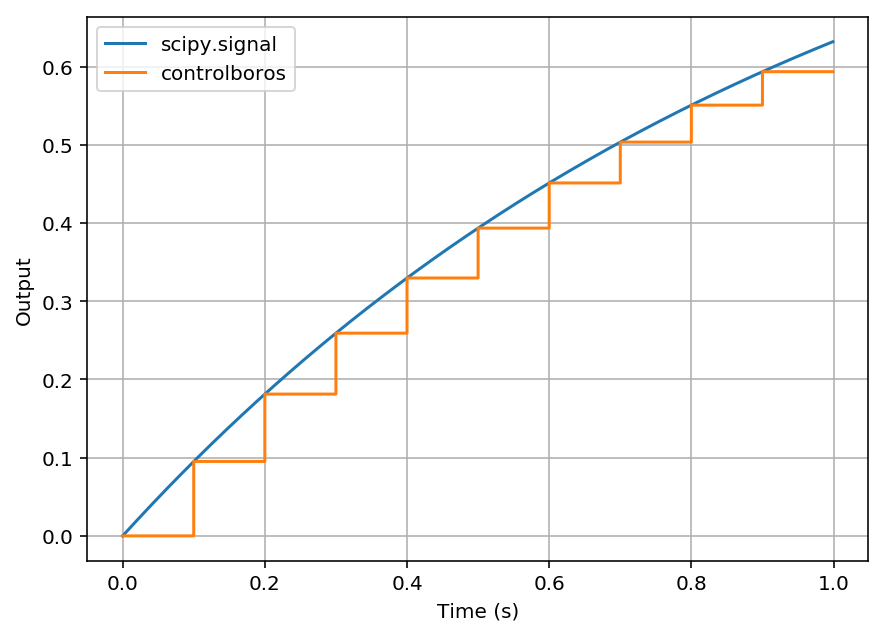

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(t_ref, y_ref)
plt.step(t_cb, y_cb, where="post")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend(["scipy.signal", "controlboros"])
plt.grid()
plt.show()